# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


1. Sumber Dataset diperoleh dari Kaggle, dengan judul dataset: Online Retail Customer Churn Dataset
https://www.kaggle.com/datasets/hassaneskikri/online-retail-customer-churn-dataset

2. Gambaran Umum Dataset
Dataset ini memberikan gambaran komprehensif tentang interaksi pelanggan dengan toko ritel online, bertujuan untuk memprediksi pelanggan yang akan berhenti berlangganan berdasarkan berbagai fitur perilaku dan demografis. Dataset ini mencakup data tentang demografi pelanggan, perilaku pengeluaran, tingkat kepuasan, dan keterlibatan dengan kampanye pemasaran. Dataset ini dirancang untuk analisis dan pengembangan model prediktif untuk mengidentifikasi pelanggan yang berisiko berhenti berlangganan, sehingga memungkinkan strategi retensi pelanggan yang tepat sasaran.

3. Deskripsi Dataset
- Customer_ID: Pengidentifikasi unik untuk setiap pelanggan.
- Age: Usia pelanggan.
- Gender: Jenis kelamin pelanggan (Laki-laki, Perempuan, Lainnya).
- Annual_Income: Pendapatan tahunan pelanggan dalam ribuan dolar.
- Total_Spend: Jumlah total pengeluaran pelanggan dalam setahun terakhir.
- Years_as_Customer: Jumlah tahun pelanggan tersebut menjadi pelanggan toko.
- Num_of_Purchases: Jumlah pembelian yang dilakukan pelanggan dalam setahun terakhir.
- Average_Transactions_Amount: Rata-rata jumlah yang dibelanjakan per transaksi.
- Num_of_Returns: Jumlah barang yang dikembalikan pelanggan dalam setahun terakhir.
- Num_of_Support_Contacts: Jumlah kali pelanggan menghubungi dukungan dalam setahun terakhir.
- Satisfaction_Score: Skor dari 1 hingga 5 yang menunjukkan kepuasan pelanggan terhadap toko.
- Last_Purchase_Days_Ago: Jumlah hari sejak pembelian terakhir pelanggan.
- Email_Opt_In: Apakah pelanggan telah menyetujui untuk menerima email pemasaran.
- Promotion_Response: Tanggapan pelanggan terhadap kampanye promosi terakhir (Menanggapi, Diabaikan, Berhenti Berlangganan).
- Target_Churn: Menunjukkan apakah pelanggan tersebut berhenti berlangganan (Benar atau Salah).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

## **3.1 Load Dataset**

In [10]:
df = pd.read_csv('../online_retail_customer_churn_raw/online_retail_customer_churn.csv', encoding='latin-1')
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [12]:
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [13]:
df.isnull().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.columns.tolist()

['Customer_ID',
 'Age',
 'Gender',
 'Annual_Income',
 'Total_Spend',
 'Years_as_Customer',
 'Num_of_Purchases',
 'Average_Transaction_Amount',
 'Num_of_Returns',
 'Num_of_Support_Contacts',
 'Satisfaction_Score',
 'Last_Purchase_Days_Ago',
 'Email_Opt_In',
 'Promotion_Response',
 'Target_Churn']

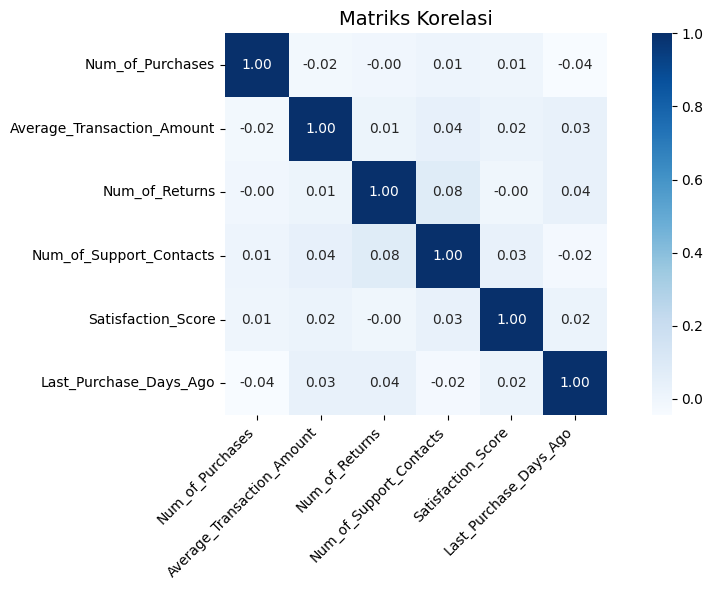

In [16]:
numeric_columns = [
    "Num_of_Purchases",
    "Average_Transaction_Amount",
    "Num_of_Returns",
    "Num_of_Support_Contacts",
    "Satisfaction_Score",
    "Last_Purchase_Days_Ago",

]
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="Blues", fmt=".2f", cbar=True, square=True)
plt.title("Matriks Korelasi", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

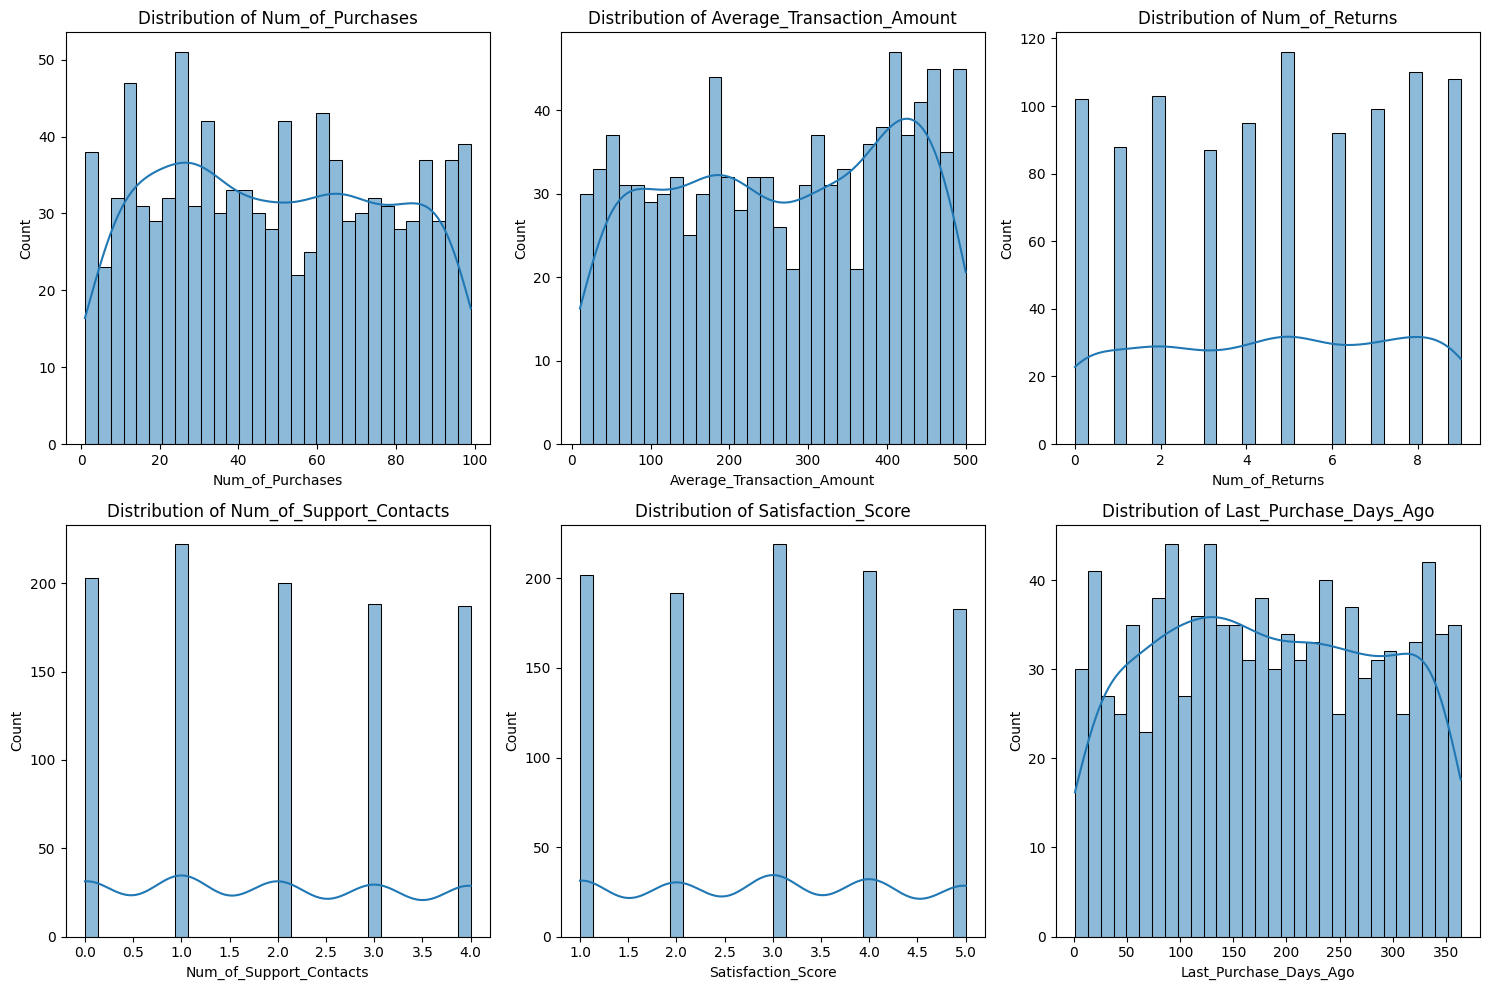

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
 
plt.tight_layout()
plt.show()

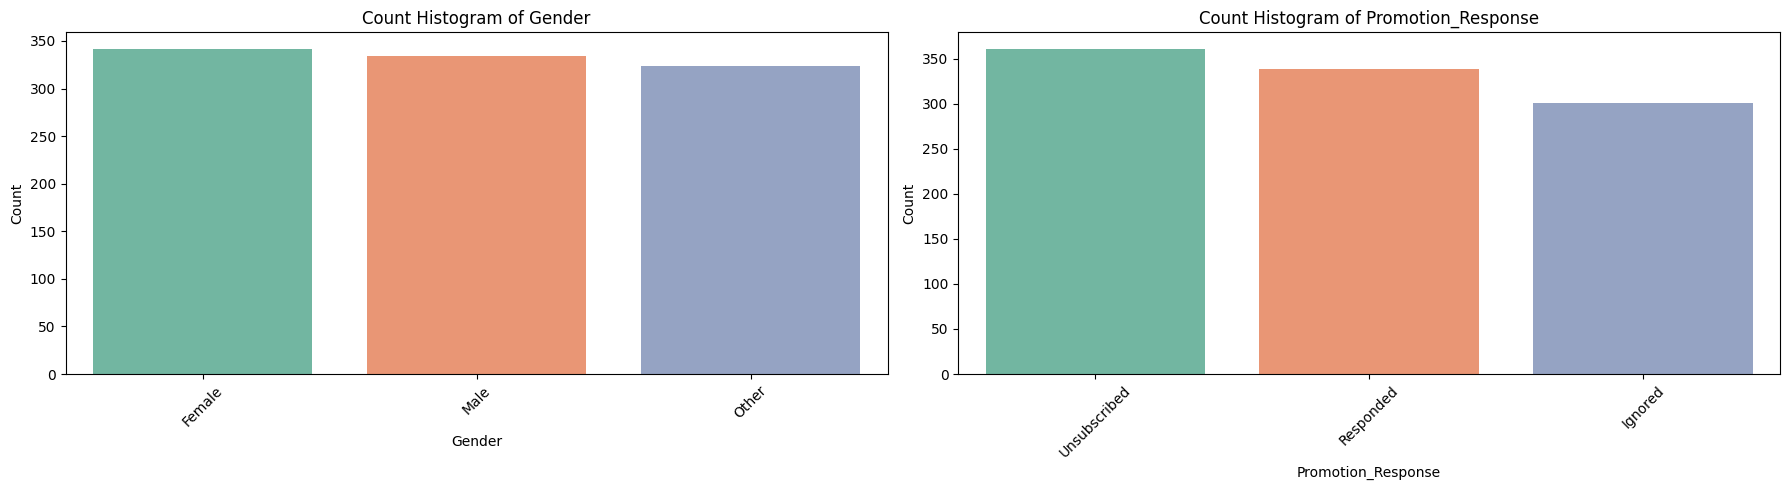

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns
cat_plots = len(categorical_cols)
cat_rows = math.ceil(cat_plots / 2)

fig, axes = plt.subplots(cat_rows, 2, figsize=(18, cat_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].fillna('Missing Values').value_counts()
    
    if len(value_counts) > 10:
        value_counts = value_counts.head(10)
    
    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        hue=value_counts.index,  
        palette='Set2',
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f'Count Histogram of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **5.1 Hapus Missing Values**

In [19]:
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

## **5.2 Hapus duplicate**

In [20]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## **5.3 Drop Column**

In [21]:
df = df.drop(columns=['Customer_ID'])
df.head()

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


## **5.4 Remove Outliers**

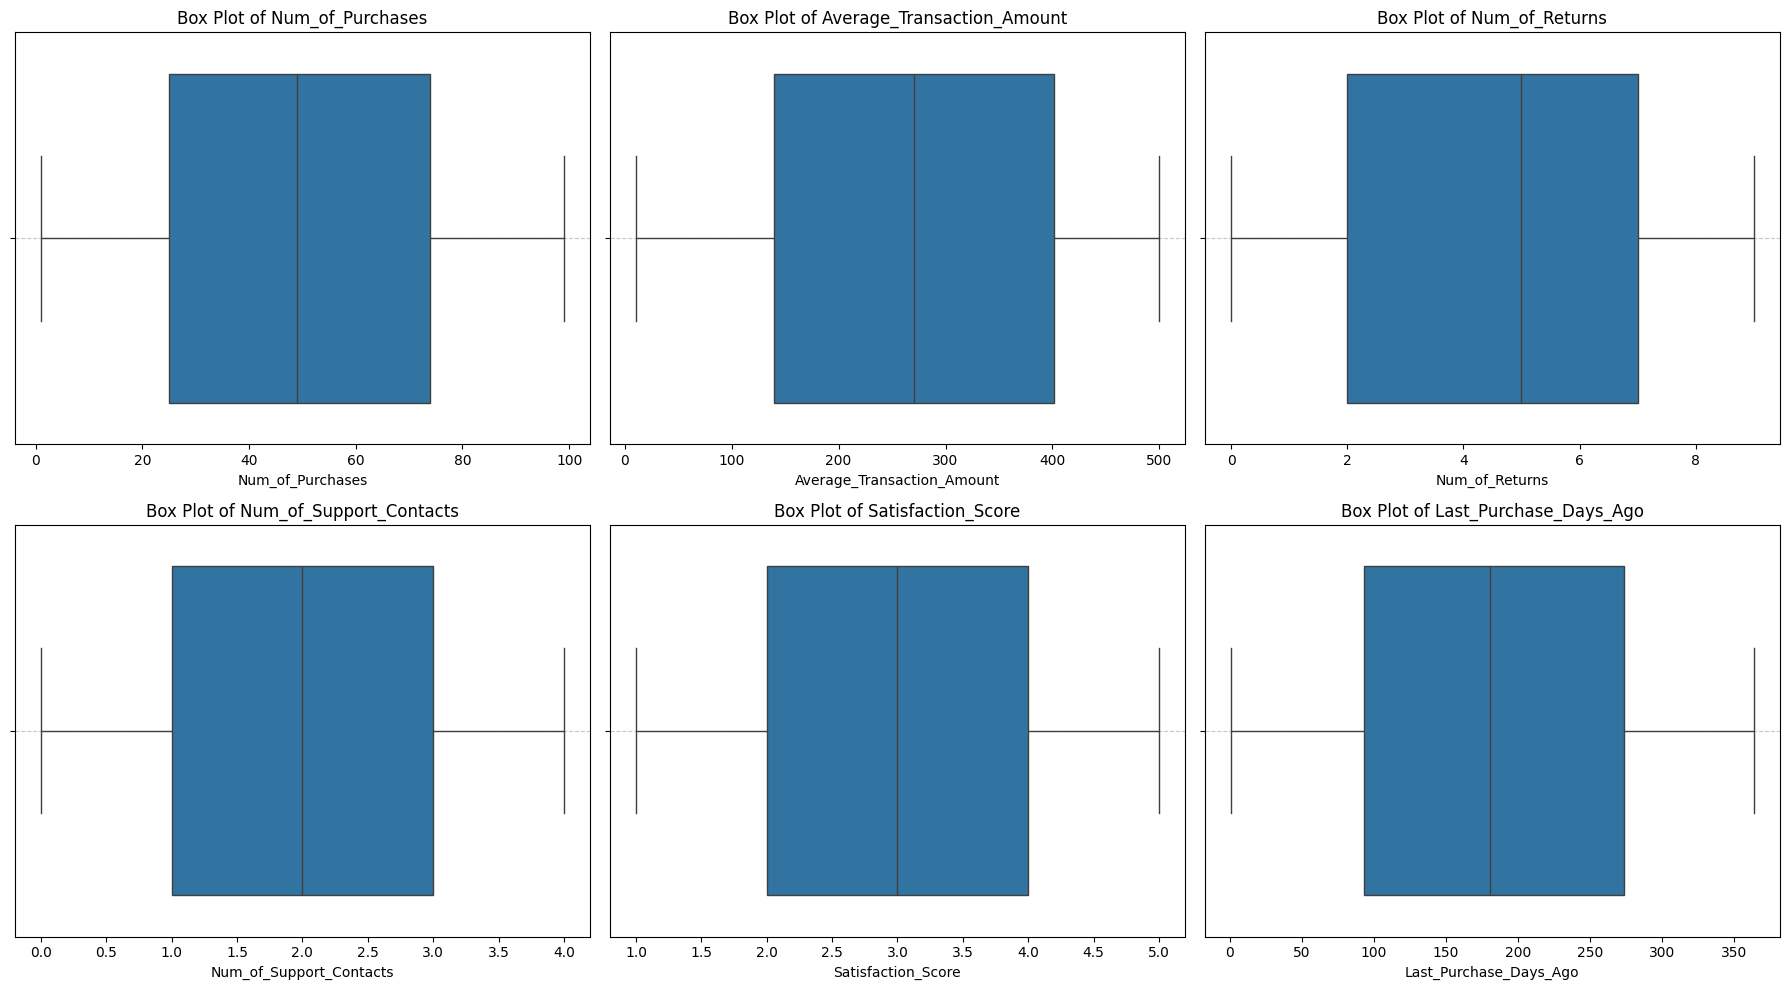

In [22]:
def plot_boxplots(df, numeric_columns):
    total_plots = len(numeric_columns)
    cols = 3  
    rows = math.ceil(total_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
    axes = axes.flatten()  

    for ax, feature in zip(axes, numeric_columns):
        sns.boxplot(x=df[feature], ax=ax)
        ax.set_title(f'Box Plot of {feature}', fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    for ax in axes[total_plots:]:
        ax.remove()

    plt.tight_layout()
    plt.show()

plot_boxplots(df, numeric_columns)

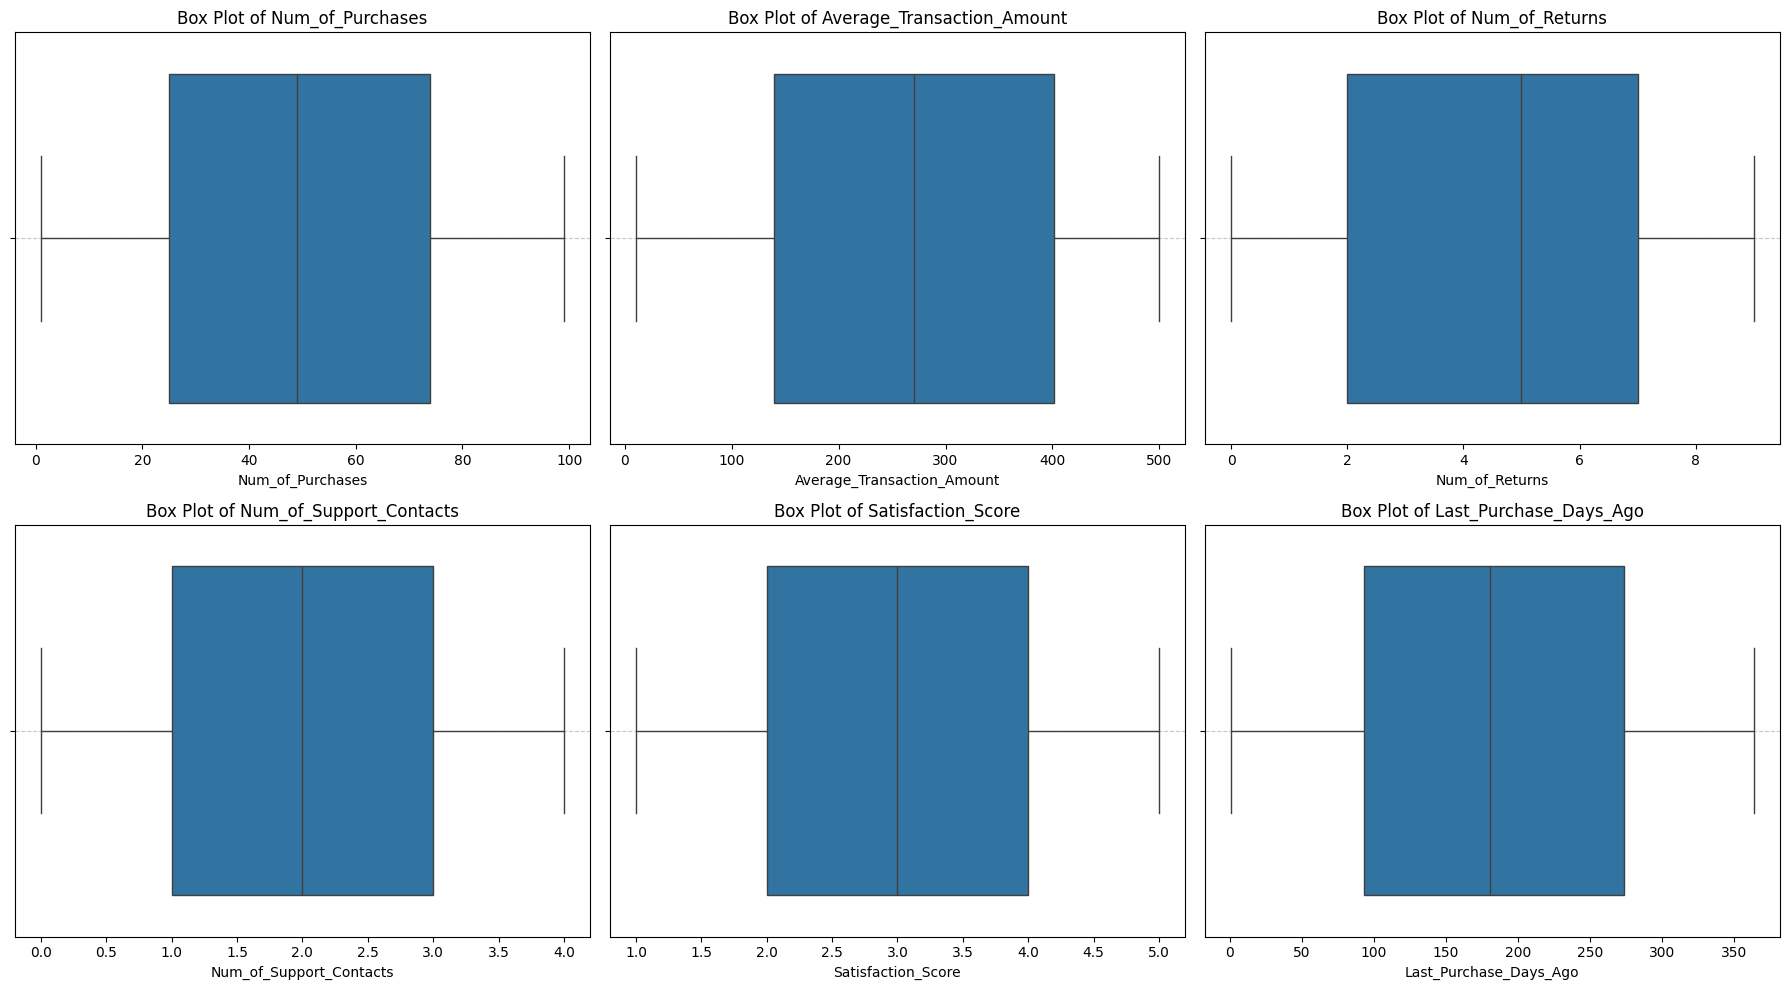

In [23]:
def remove_outliers_all_columns(df, numeric_columns):
    mask = pd.Series(True, index=df.index)
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = mask & (df[col] >= lower_bound) & (df[col] <= upper_bound)
    df.drop(df[~mask].index, inplace=True)

def plot_boxplots(df, numeric_columns):
    remove_outliers_all_columns(df, numeric_columns)

    total_plots = len(numeric_columns)
    cols = 3  
    rows = math.ceil(total_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
    axes = axes.flatten() 

    for ax, feature in zip(axes, numeric_columns):
        sns.boxplot(x=df[feature], ax=ax)
        ax.set_title(f'Box Plot of {feature}', fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    for ax in axes[total_plots:]:
        ax.remove()

    plt.tight_layout()
    plt.show()

plot_boxplots(df, numeric_columns)

## **5.5 Binning kolom Age dan Label Encoder fitur Kategorikal**

In [24]:
age_bins = [16, 25, 35, 45, 55, 65, float('inf')]
age_labels = [
    "Remaja Akhir (17-25)",
    "Dewasa Awal (26-35)",
    "Dewasa Akhir (36-45)",
    "Lansia Awal (46-55)",
    "Lansia Akhir (56-65)",
    "Manula (>65)"
]
age_binned = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=True)
le_age = LabelEncoder()
df["Age"] = le_age.fit_transform(age_binned)

categorical_cols = df.select_dtypes(include=['object','bool']).columns

encoders = {} 
encoders["Age"] = le_age
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    df[col] = df[col].astype('int')  
    encoders[col] = le 
    
df.head(5)

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,2,2,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,1
1,2,1,79.51,9025.47,13,77,22.90,2,2,3,227,0,1,0
2,5,1,29.19,618.83,13,71,50.53,5,2,2,283,0,1,1
3,5,2,79.63,9110.30,3,33,411.83,5,3,5,226,1,0,1
4,5,2,77.66,5390.88,15,43,101.19,3,0,5,242,0,2,0


## **5.6 Scaler fitur numerik**

In [25]:
scaler = StandardScaler()
numeric_columns = [
        'Annual_Income', 'Total_Spend', 'Years_as_Customer', 
        'Num_of_Purchases', 'Average_Transaction_Amount', 
        'Num_of_Returns', 'Num_of_Support_Contacts', 
        'Satisfaction_Score', 'Last_Purchase_Days_Ago'
    ]
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()


,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,2,2,-1.264973,0.283773,-0.854240,-0.962378,1.282050,-0.902114,-1.379444,0.018689,-0.516489,1,1,1
1,2,1,-0.614434,1.378924,0.591480,0.965463,-1.673359,-0.902114,0.047075,0.018689,0.422756,0,1,0
2,5,1,-1.567145,-1.559749,0.591480,0.755153,-1.483853,0.134005,0.047075,-0.700136,0.959468,0,1,1
3,5,2,-0.612162,1.408578,-1.215669,-0.576810,0.994191,0.134005,0.760335,1.456339,0.413172,1,0,1
4,5,2,-0.649460,0.108396,0.952910,-0.226294,-1.136392,-0.556741,-1.379444,1.456339,0.566518,0,2,0


In [26]:
# Simpan hasil preprocessing ke file CSV
df.to_csv('online_retail_customer_churn_preprocessing.csv', index=False)

print("Berhasil mengekspor dataset: online_retail_customer_churn_preprocessing.csv")

Berhasil mengekspor dataset: online_retail_customer_churn_preprocessing.csv
